If using all predictors but not aggregating, it is possible to achieve an R2 score of 0.25 with MSE of 57 and MAE of 4.1 which is extremely high.

In [5]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [6]:
mapping_file_path = '/Users/fabrizioserafini/Desktop/senior_year/Senior Thesis/thesis_project/data/mapped'

# name and dataframe? or just a list?
dfs = {}

files = os.listdir(mapping_file_path)
relevant = []

# filterning relevant data
for file in files:
    if 'processed.csv' in file.split('_'):
        relevant.append(file)

# reading the relevant dfs
for df in relevant:
    print(df)
    read = pd.read_csv(mapping_file_path + '/' + df)
    read.set_index(['id'], inplace=True)
    dfs[df] = read

mapped_cdp_ghg_verification_frim_year_processed.csv
mapped_cdp_methane_processed.csv
mapped_cdp_target_processed.csv
mapped_cdp_initative_method_processed.csv
mapped_cdp_incentives_processed.csv
mapped_cdp_lowcarbon_processed.csv
mapped_cdp_summary_selected_processed.csv
mapped_cdp_ghg_change_processed.csv
mapped_cdp_ghg_int_processed.csv
mapped_cdp_ghg_all_scopes_processed.csv
mapped_cdp_carbon_credits_full_processed.csv
mapped_cdp_initiative_processed.csv
mapped_cdp_initiative_firm_year_processed.csv
mapped_cdp_riskopp_processed.csv


In [7]:
# Concatenate all DataFrames along the columns
combined_df = pd.concat(dfs, axis=1)

# Drop duplicate columns
combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]

# Reset the index if needed
combined_df.reset_index(inplace=True)

In [8]:
combined_df.columns = combined_df.columns.get_level_values(1)

In [9]:
combined_df = combined_df.iloc[:, 2:]

In [10]:
# Drop duplicate columns
combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]

# Reset the index if needed
combined_df.reset_index(inplace=True)

In [11]:
combined_df.drop(columns=['index'], inplace=True)

In [12]:
combined_df.shape

(24302, 132)

In [13]:
# print all the columns
for col in combined_df.columns:
    print(col)


year
isin
proportion_verified_scope1
proportion_verified_scope2
ghg_verification_scope1_no data
ghg_verification_scope1_yes
ghg_verification_scope2_no data
ghg_verification_scope2_yes
ghg_verification_scope3_no data
ghg_verification_scope3_yes
type_scope1_limited
type_scope1_moderate
type_scope1_n/a
type_scope1_reasonable
type_scope1_third party underway
absent_cdp_ghg_verification_frim_year_processed.csv
Unnamed: 0
methane_emissions
absent_cdp_methane_processed.csv
cdp_targetduration_mean
cdp_timeprogress_mean
cdp_targetscope_percent_mean
cdp_targetamount_mean
cdp_baseyear_mean
cdp_baseyearemission_mean
cdp_targettype_absolute
cdp_targettype_intensity
cdp_targetduration_mean_missing
cdp_timeprogress_mean_missing
cdp_targetscope_percent_mean_missing
cdp_targetamount_mean_missing
cdp_baseyear_mean_missing
cdp_baseyearemission_mean_missing
absent_cdp_target_processed.csv
method_ind_MACC
method_ind_budget_efficiency
method_ind_budget_low_carbon
method_ind_compliance
method_ind_employee_en

In [14]:
train_data = combined_df[combined_df['year'] < 2021].drop(columns=['ghg_change_real_cat_next'])
test_data = combined_df[combined_df['year'] == 2021].drop(columns=['ghg_change_real_cat_next'])

train_isins = train_data['isin']
test_isins = test_data['isin']

X_train = train_data.drop(columns=['ghg_change_real_next', 'isin', 'Unnamed: 0', 'ghg_change_real_cat', 'ghg_change_real', 'ghg_change_total'])
X_test = test_data.drop(columns=['ghg_change_real_next', 'isin', 'Unnamed: 0', 'ghg_change_real_cat', 'ghg_change_real', 'ghg_change_total'])
y_train = train_data['ghg_change_real']
y_test = test_data['ghg_change_real']

In [15]:
# fit a random forest model with tuning and cross validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# fit a random forest model with the best parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=None, n_jobs=-1, random_state=42, verbose=3)
rf.fit(X_train, y_train)

# predict on the test set
y_pred = rf.predict(X_test)

# calculate the mean squared error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [16]:
# r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.24977289714287065

In [17]:
mean_squared_error(y_test, y_pred)

57.10396995427295

In [18]:
mean_absolute_error(y_test, y_pred)

4.1021376018888605

In [19]:
combined_df.to_csv("combined.csv")

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

7.556716876678188

In [ ]:
#MAE 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.1021376018888605

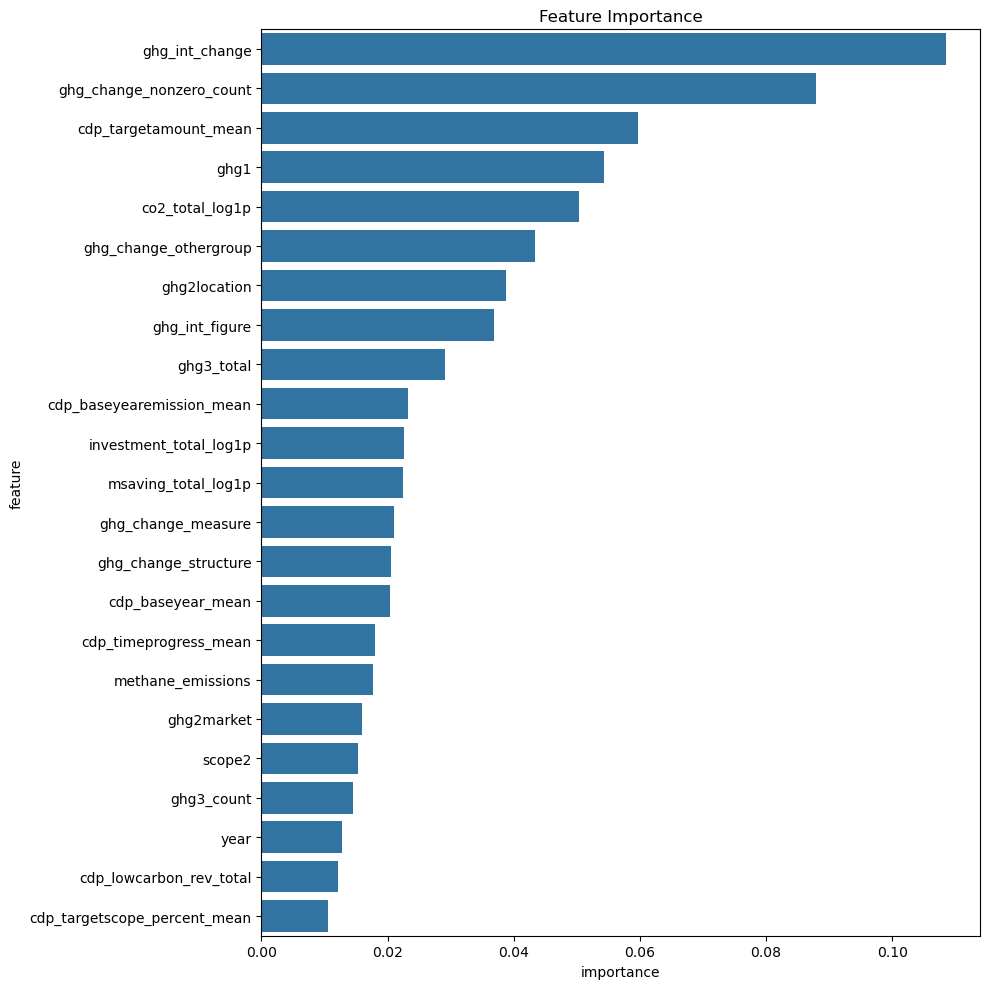

In [ ]:
# feature importance plot
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.columns = ['feature', 'importance']
feature_importances = feature_importances[feature_importances['importance'] > 0.01]
plt.figure(figsize=(10, 10))
sns.barplot(x="importance", y="feature", data=feature_importances)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()